## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib -qq
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [5]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [6]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [7]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [9]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

In [10]:
df_con = df[df["Country"].isin(country_group)]

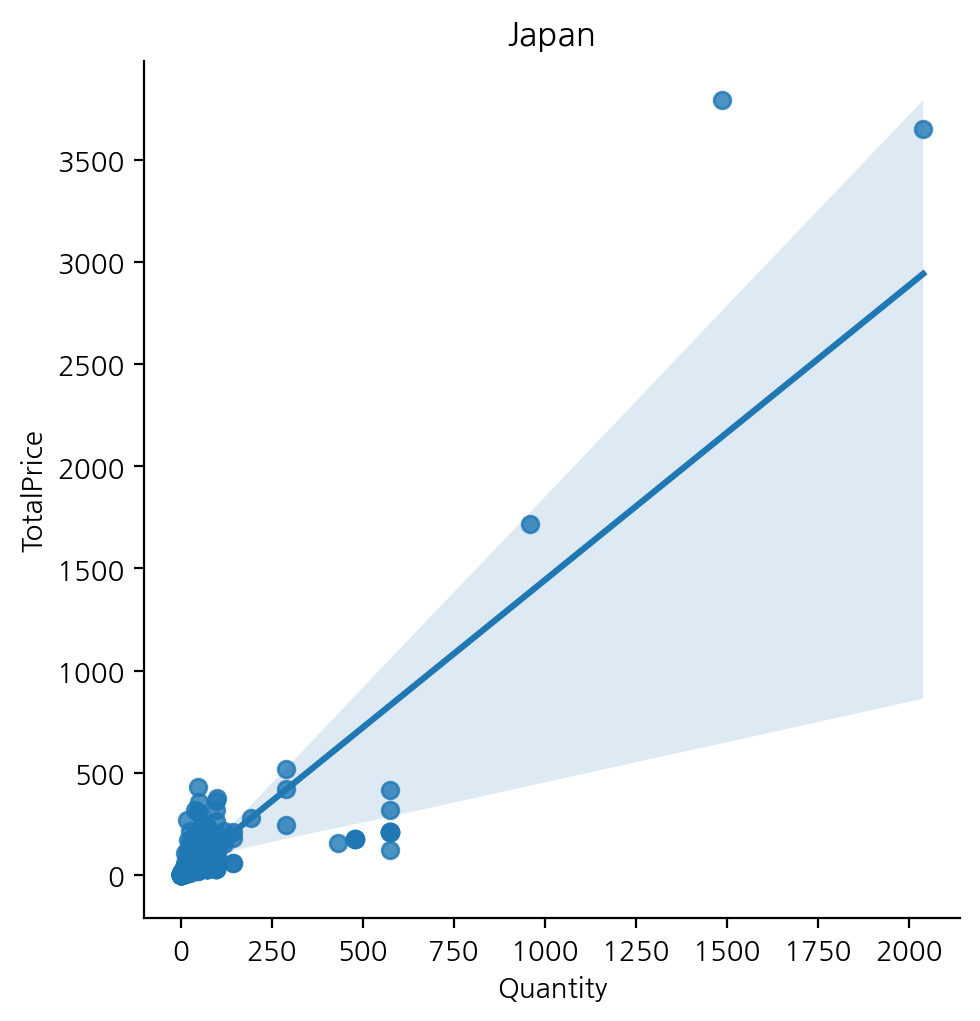

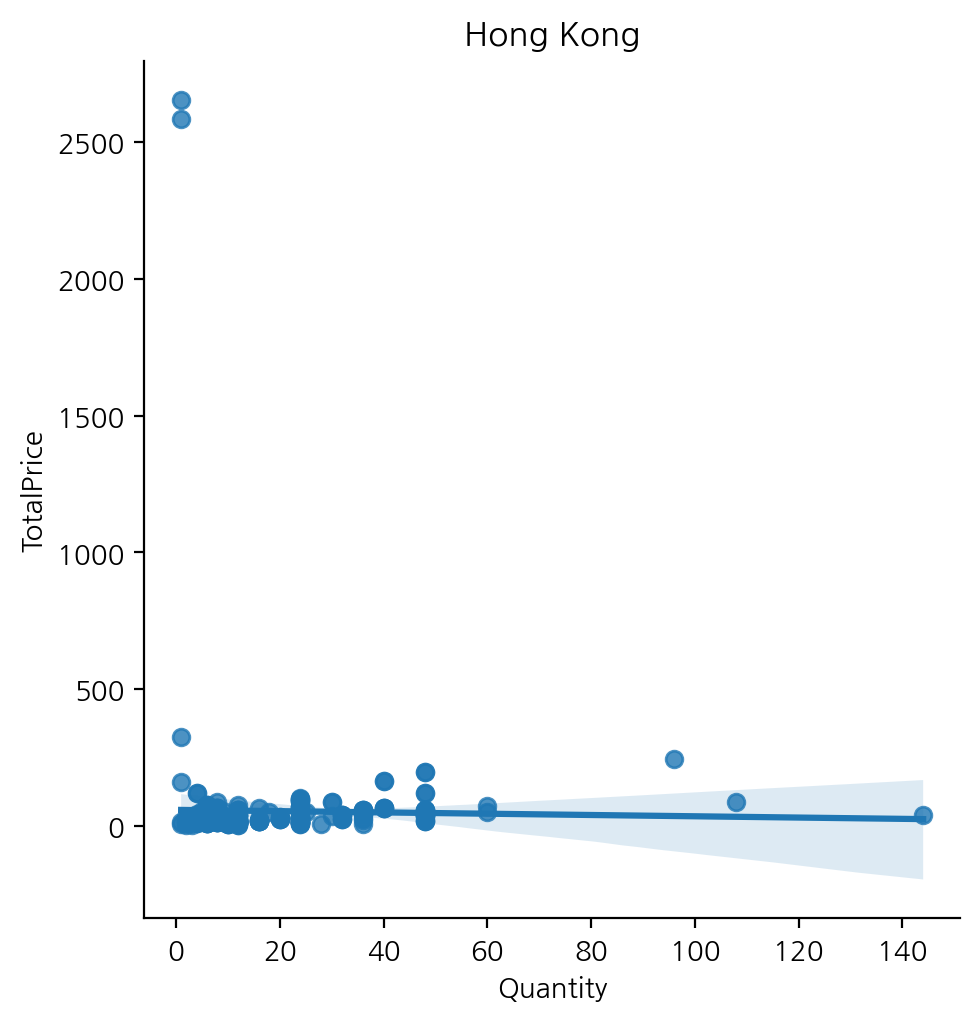

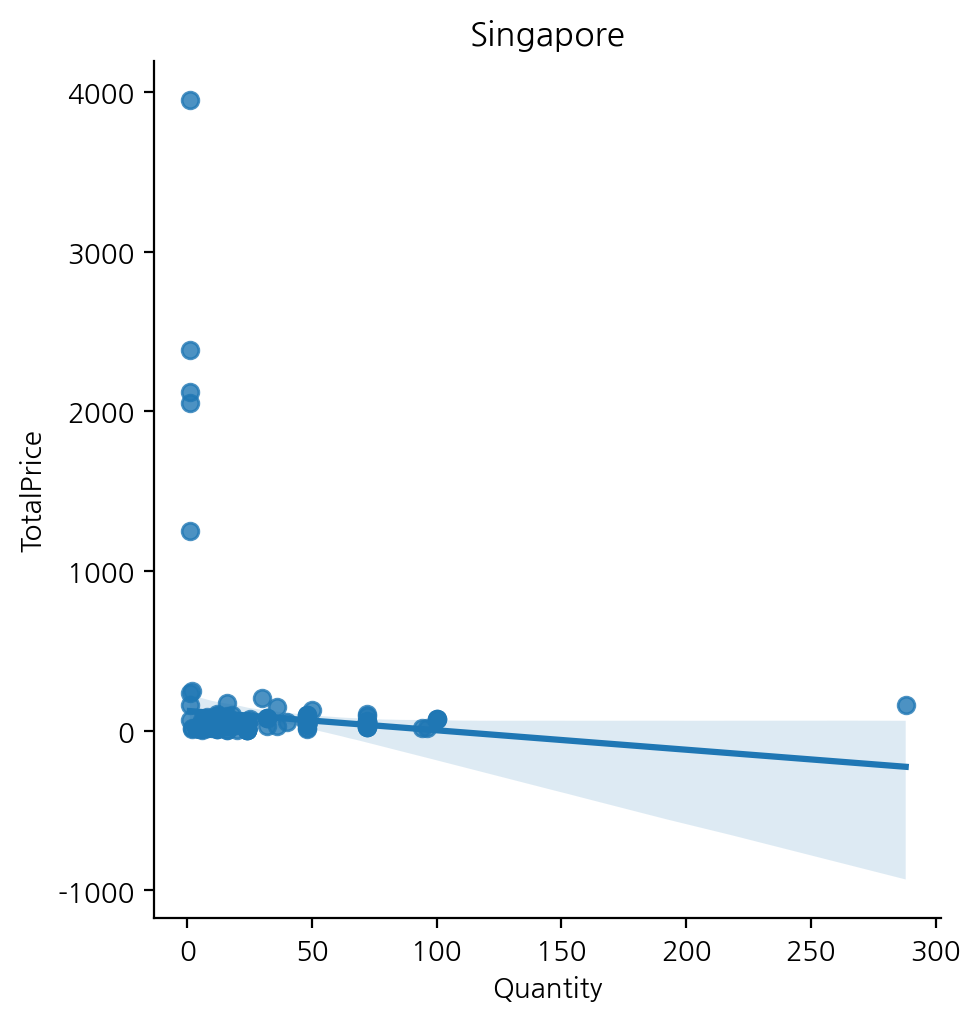

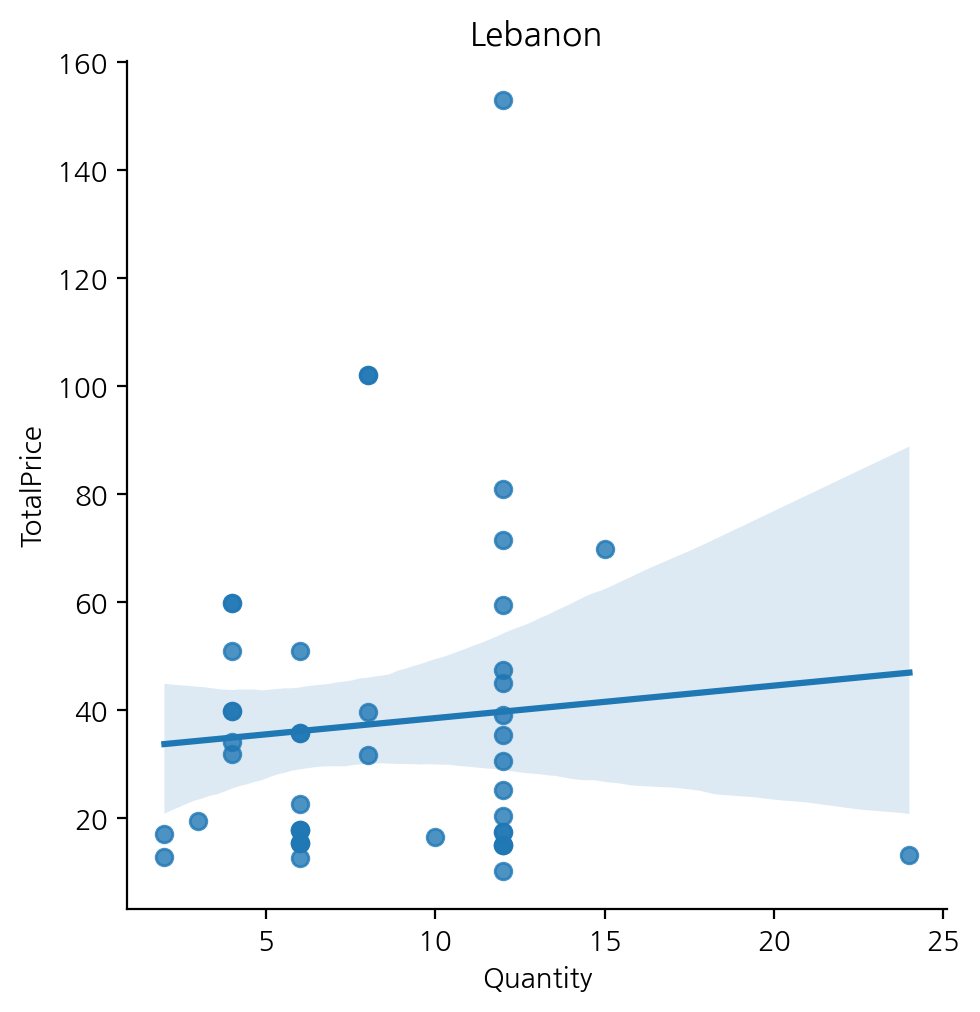

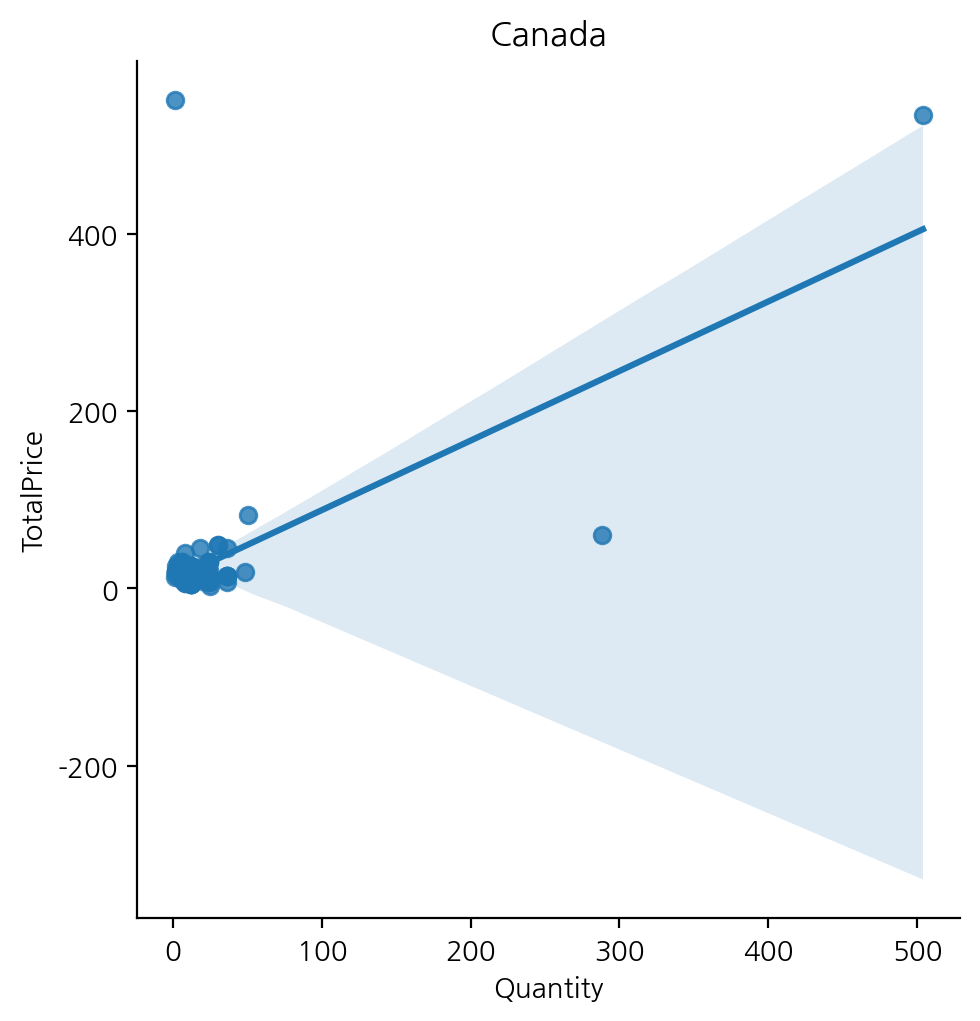

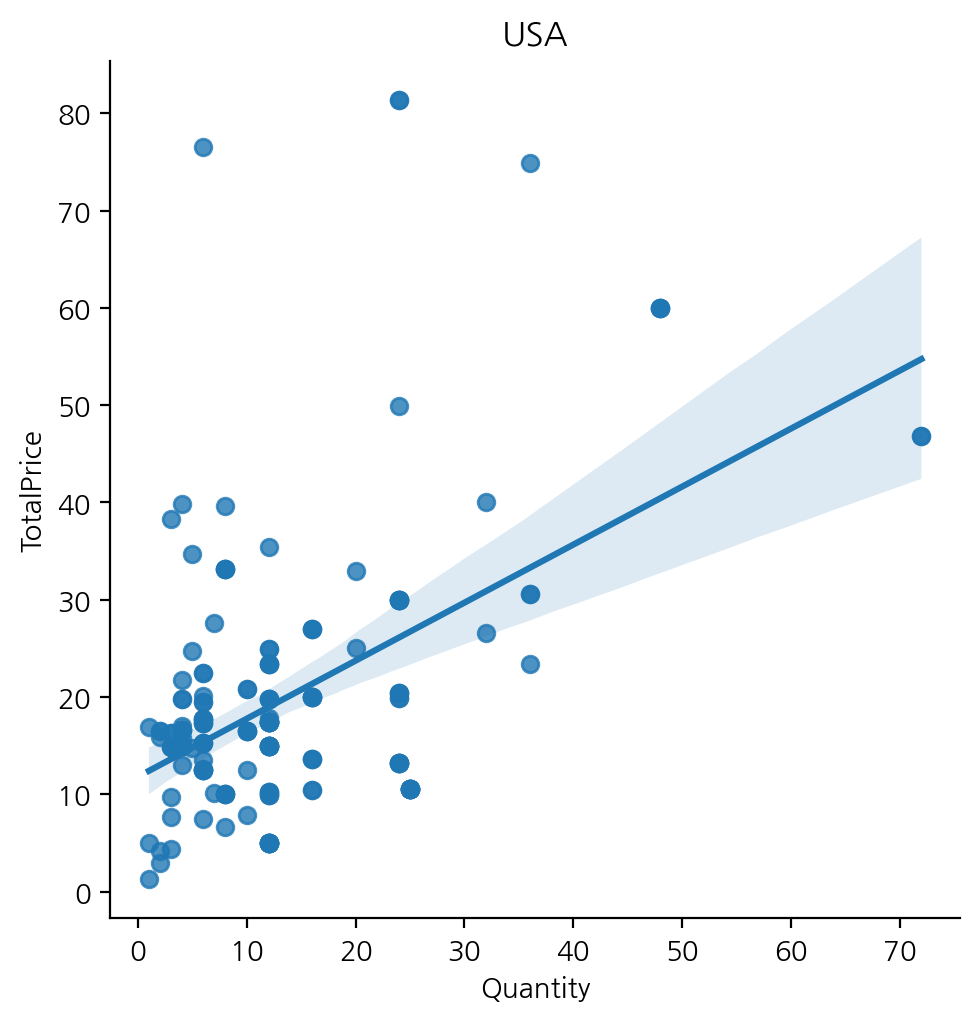

In [11]:
for i, country in enumerate(country_group):
    data_country = df_con[df_con['Country'] == country]
    sns.lmplot(x='Quantity', y='TotalPrice', data=data_country)
    plt.title(country)

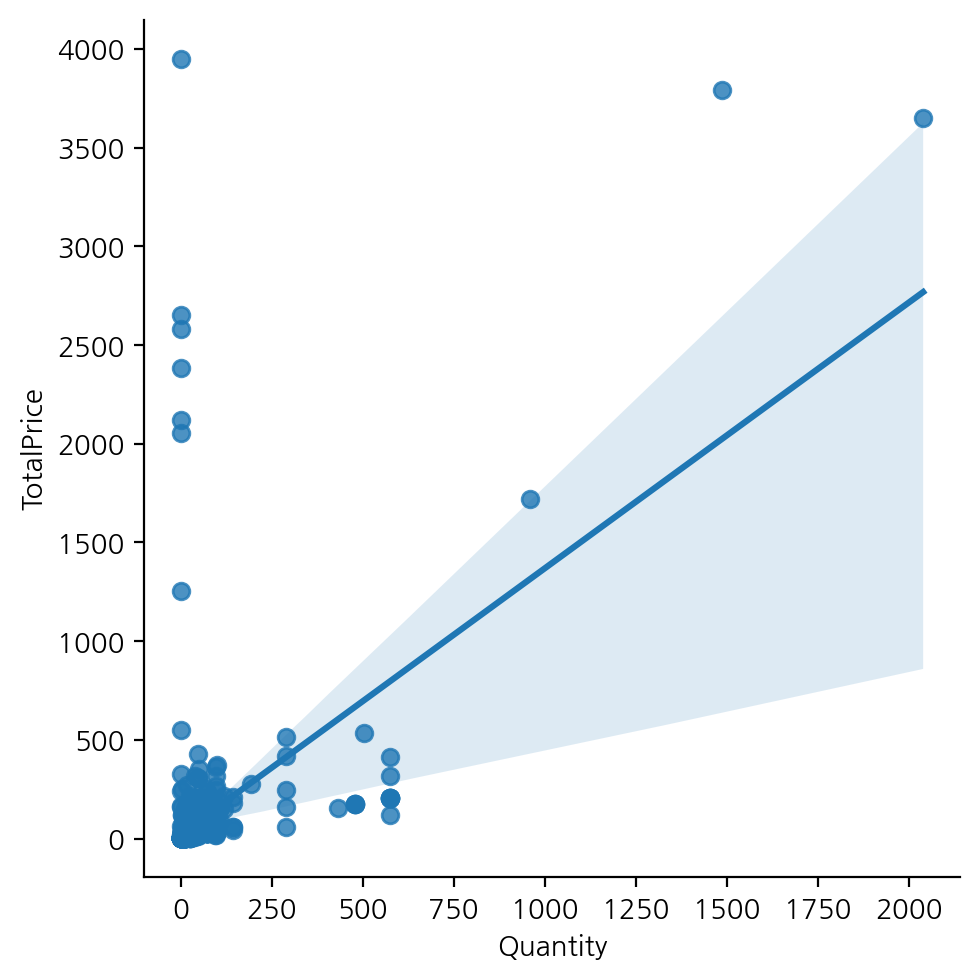

In [12]:
sns.lmplot(x="Quantity", y="TotalPrice", data=df_con)

In [13]:
for c in country_group:
  corr_score = df_con.loc[df_con["Country"] == c, "Quantity"].corr(df_con["TotalPrice"])
  print(f"{c} : {corr_score}")

Japan : 0.8363602731917437
Hong Kong : -0.018106553028170973
Singapore : -0.09152351862727037
Lebanon : 0.08910754244452809
Canada : 0.5989796221282317
USA : 0.4924599740044954


In [14]:
corr = df_con['Quantity'].corr(df_con['TotalPrice'])
corr

0.5309195376338488

전체 데이터와 각 국가로 분리하였을 때의 추세를 확인하였을 때, 홍콩의 경우 완전히 다른 방향성을 보여주기도 하였으며, 반면 일본과 캐나다의 경우 전체 데이터에 대한 추세와 거의 일치하는 모습을 볼 수 있었다.
이를 통해 심슨의 역설을 확인할 수 있었다. 각 하위그룹의 추세와 본 데이터 전체의 추세가 서로 다른 결과를 보여줬기 때문이다.

이를 비즈니스로 적용한다면, 각 국가별로 다른 판매전략을 결정하고 물건의 가격 책정시에도 함께 고려해야 된다고 본다.
이러한 사례로는 유튜브 프리미엄 정기결제가 있다. 이는 각 국가의 GDP를 기준으로 가격을 따로 책정해주는 것으로 국가별 화폐 가치나 여러 사회 요인에 따른 가격 격차를 해소해준다.

## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [15]:
import statsmodels.api as sm
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
model_ols = sm.OLS(y_train, X_train).fit()

In [18]:
X_test_ols = sm.add_constant(X_test)
y_pred_ols = model_ols.predict(X_test_ols)
y_pred_ols

323561    17.036886
396001    17.671204
64629     18.199802
296321    29.617523
31586     27.714570
            ...    
193532    17.882643
442255    16.825447
150749    18.738972
455846    19.256999
434779    17.459765
Length: 106021, dtype: float64

<Axes: xlabel='TotalPrice'>

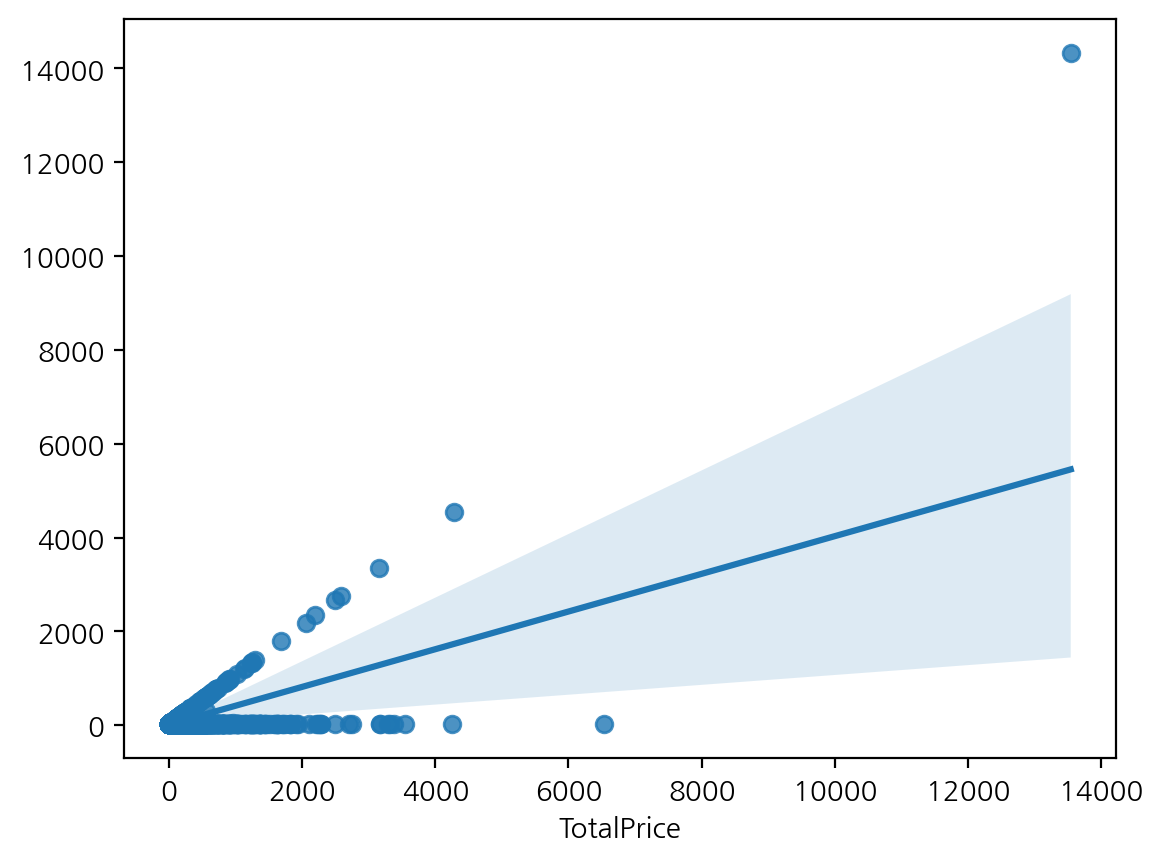

In [19]:
sns.regplot(x=y_test, y=y_pred_ols)

In [20]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5273.
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:23:30   Log-Likelihood:            -3.0173e+06
No. Observations:              424083   AIC:                         6.035e+06
Df Residuals:                  424081   BIC:                         6.035e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1383      0.461     35.039      0.0

결정계수 R이 매우 작은 값은 0.012인 것으로 보아, 데이터의 설명력이 매우 작다는 것을 알 수  있습니다. 이는 회귀 직선이 두 변수를 제대로 설명하지 못하고 있다는 것을 알 수 있습니다.

## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [43]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [22]:
df_promotion["InvoiceDate"].unique

<bound method Series.unique of 0       2010-12-01 08:26:00
1       2010-12-01 08:26:00
2       2010-12-01 08:26:00
3       2010-12-01 08:26:00
4       2010-12-01 08:26:00
                ...        
42448   2010-12-23 16:06:00
42449   2010-12-23 16:06:00
42450   2010-12-23 16:06:00
42451   2010-12-23 16:06:00
42452   2010-12-23 16:06:00
Name: InvoiceDate, Length: 26157, dtype: datetime64[ns]>

In [42]:
df_promotion["IsChristmasPeriod"].value_counts()

True    26157
Name: IsChristmasPeriod, dtype: int64

In [24]:
df_promotion["IsChristmasProduct"].value_counts()

False    24556
True      1601
Name: IsChristmasProduct, dtype: int64

In [25]:
target = df_promotion[df_promotion["IsChristmasProduct"]]
others = df_promotion[df_promotion["IsChristmasProduct"] != 0]

In [26]:
df_promotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26157 entries, 0 to 42452
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           26157 non-null  category      
 1   StockCode           26157 non-null  category      
 2   Description         26157 non-null  category      
 3   Quantity            26157 non-null  int32         
 4   InvoiceDate         26157 non-null  datetime64[ns]
 5   UnitPrice           26157 non-null  float64       
 6   CustomerID          26157 non-null  float32       
 7   Country             26157 non-null  object        
 8   InvoiceMonth        26157 non-null  int64         
 9   TotalPrice          26157 non-null  float64       
 10  IsChristmasPeriod   26157 non-null  bool          
 11  IsChristmasProduct  26157 non-null  bool          
dtypes: bool(2), category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memo

<Figure size 1200x600 with 0 Axes>

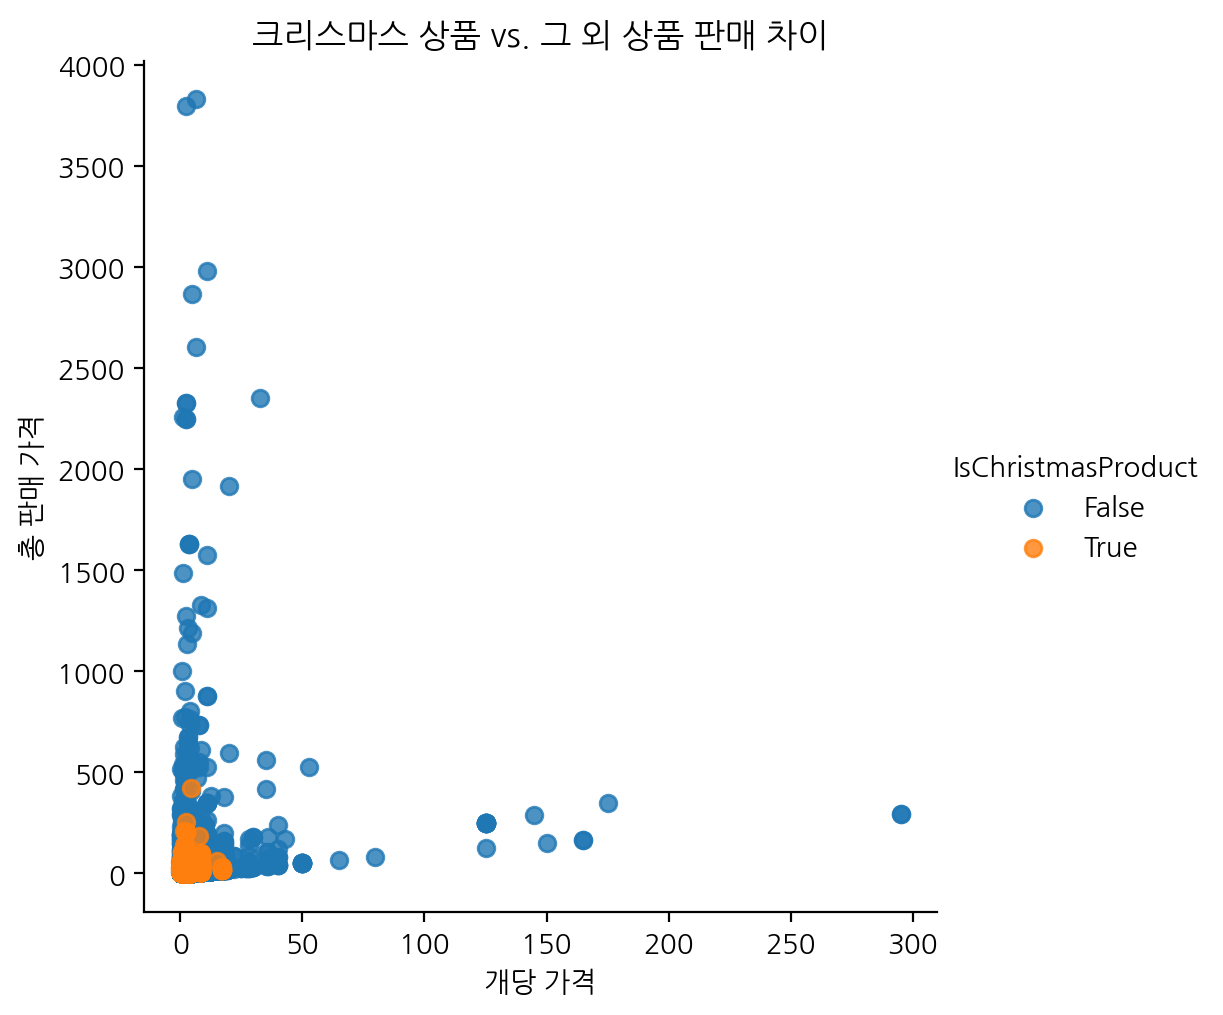

In [33]:
plt.figure(figsize=(12, 6))
sns.lmplot(x="UnitPrice", y="TotalPrice", hue="IsChristmasProduct", data=df_promotion, fit_reg=False)
plt.title("크리스마스 상품 vs. 그 외 상품 판매 차이")
plt.xlabel("개당 가격")
plt.ylabel("총 판매 가격")
plt.show();

In [28]:
average_sales_christmas = target["TotalPrice"].mean()
average_sales_others = others["TotalPrice"].mean()

print(f"크리스마스 상품의 평균 판매량: {average_sales_christmas}")
print(f"그 외 상품의 평균 판매량: {average_sales_others}")

크리스마스 상품의 평균 판매량: 15.158107432854466
그 외 상품의 평균 판매량: 15.158107432854466


## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [34]:
import statsmodels.formula.api as smf

In [49]:
df_promotion.describe()

,Quantity,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
count,26157.000000,26157.000000,26157.000000,26157.0,26157.000000
mean,11.938105,3.132454,15529.182617,12.0,21.895244
std,45.941418,5.220482,1740.336670,0.0,76.642278
min,1.000000,0.070000,12347.000000,12.0,0.140000
25%,2.000000,1.250000,14161.000000,12.0,4.200000
50%,4.000000,2.100000,15570.000000,12.0,10.500000
75%,12.000000,3.750000,17179.000000,12.0,19.800000
max,2880.000000,295.000000,18269.000000,12.0,3828.000000


<Axes: >

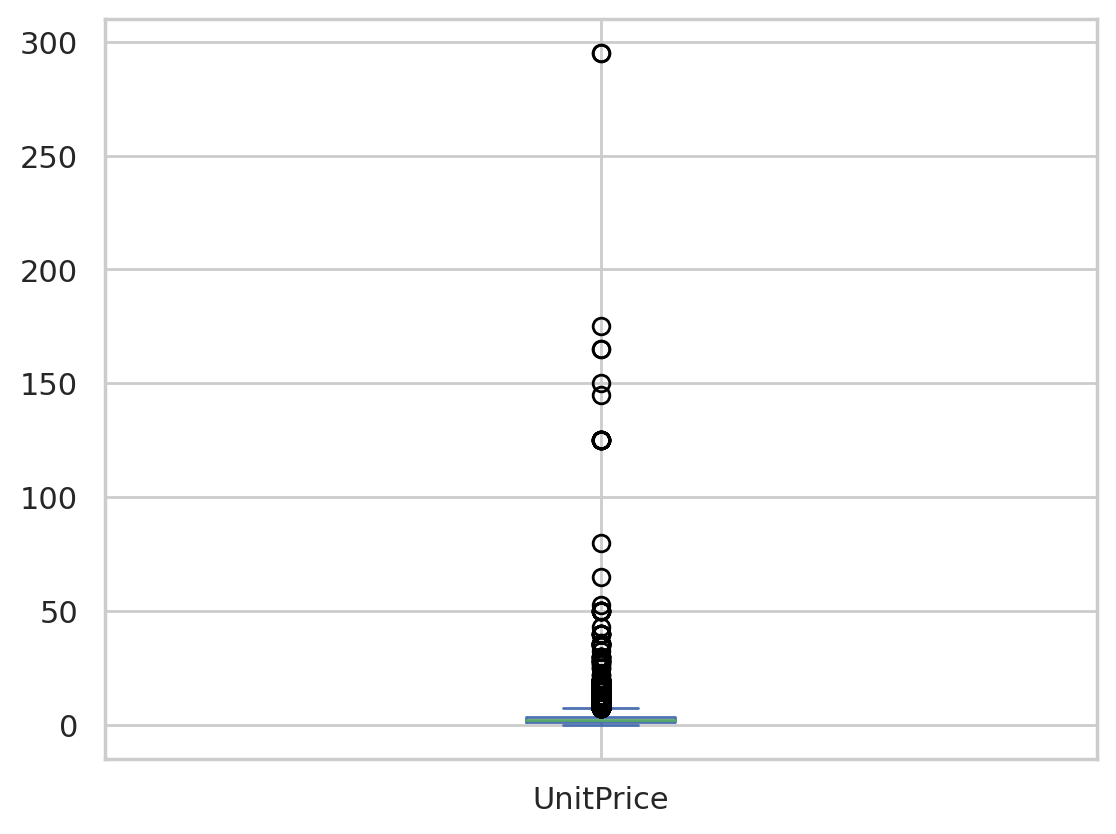

In [59]:
df_promotion["UnitPrice"].plot.box()

<Axes: >

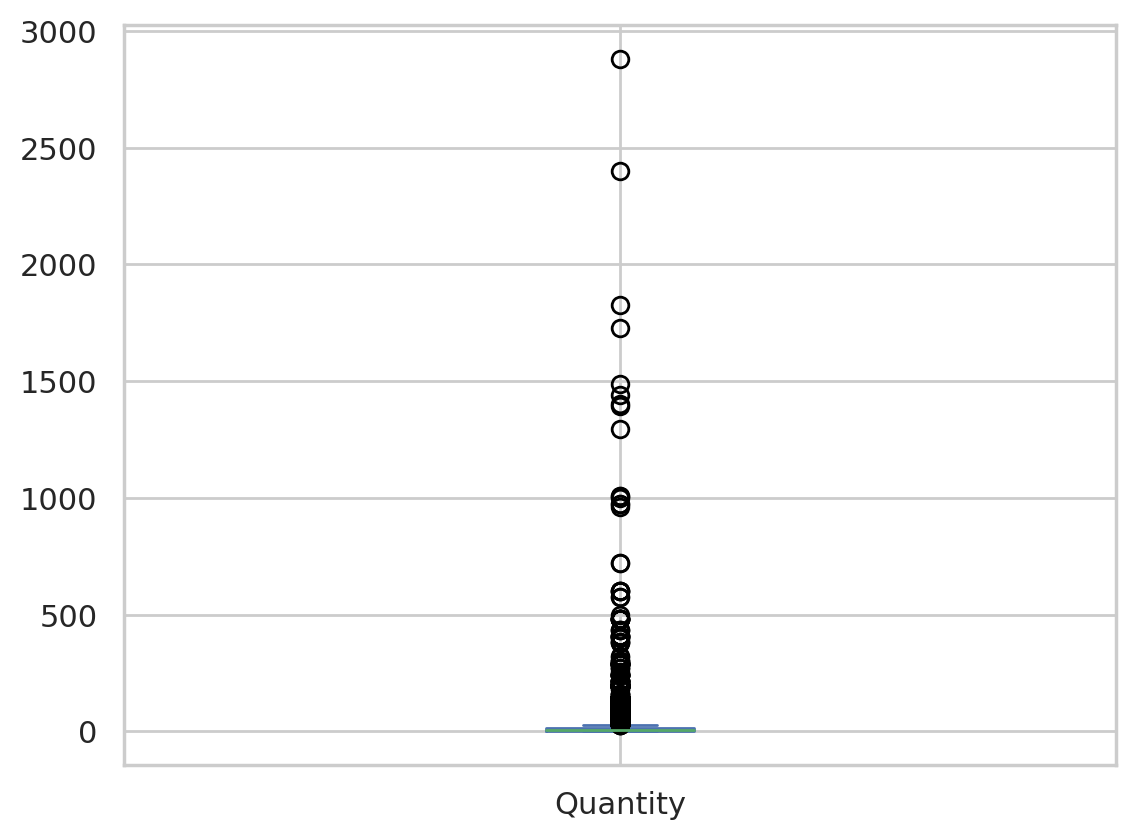

In [60]:
df_promotion["Quantity"].plot.box()

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [62]:
selected_cols = ["Quantity", "UnitPrice"]

df_scaled = df_promotion.copy()
df_scaled[selected_cols] = scaler.fit_transform(df_promotion[selected_cols])

In [65]:
model = smf.ols(formula='Quantity ~ IsChristmasProduct + UnitPrice + Country', data=df_scaled).fit()

In [66]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     31.87
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          5.46e-138
Time:                        03:50:20   Log-Likelihood:                -36753.
No. Observations:               26157   AIC:                         7.355e+04
Df Residuals:                   26133   BIC:                         7.375e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

- Intercept[절편]: Intercept는 모든 독립 변수가 0일 때의 종속 변수의 추정치를 나타냅니다. 이 경우, 16.8705로 추정되었습니다.
- IsChristmasProduct[T.True]: 크리스마스 상품 여부에 대한 이진 변수. Coef는 -0.0169로, 크리스마스 상품이 판매량을 감소시키는 경향이 있으나 p-value가 0.05보다 크므로 유의미하지 않을 수 있습니다.
- Country[T.X]: 각 국가에 대한 더미 변수들. 이 값이 유의미하다면 해당 국가가 판매량에 영향을 미침을 나타냅니다. Finland, Sweden이 대표적으로 영향을 크게 미치는 국가입니다.
- UnitPrice: 단가에 대한 회귀 계수. -0.0626로, 단가가 높을수록 판매량이 감소하는 경향이 있습니다.

------------------
가장 먼저 크리스마스 상품이 판매량에 큰 영향을 끼치지 않는다면, 기존 크리스마스의 상품 판매 전략을 재고하고 개선할 필요가 있어 보입니다.

추가적으로, 판매 단가가 높을 수록 판매량이 감소하는 경향으로 미루어 보아 단가를 적절히 조절하여 판매량을 늘리거나, 단가를 확실하게 올려서 적은 판매량으로도 높은 매출을 낼 수 있는 구조로 확장하는 것이 유리해 보입니다.

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

False    6720
True     2028
Name: Target, dtype: int64

In [68]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [70]:
y_pred = model.predict(X_test)

In [71]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1244  109]
 [ 357   40]]


In [72]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.92      0.84      1353
        True       0.27      0.10      0.15       397

    accuracy                           0.73      1750
   macro avg       0.52      0.51      0.49      1750
weighted avg       0.66      0.73      0.68      1750

